<a href="https://colab.research.google.com/github/parichayportfolio/FORE_BDA/blob/main/ECG_Dataset_Project_DLNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: ECG of Cardiac Ailments Dataset
https://www.kaggle.com/datasets/akki2703/ecg-of-cardiac-ailments-dataset

The Data set consists of 1200 records of Cardiovascular ECGs where each of the 300 records belongs to one ailment, in such a way 4 ailments have been considered. The original signals are taken from the MIT-BIH physio-net Database. One ailment is the MIT-BIH Arrhythmia Database, the other is BIDMC Congestive Heart Failure Database and MIT-BIH Atrial Fibrillation Database and finally MIT-BIH Normal Sinus Rhythm Database. From these four databases, ECG records have been segmented at 4120 samples each forming 300 signals. They are normalized with mentioned gain for each database and are preprocessed with bandpass filters. MODWPT technique was used to obtain 54 features that are given as columns in .csv file that is uploaded here. So the file has 1200 x 54 size records.

Citation:


1.   Alekhya, L., and P. Rajesh Kumar, "A new approach to detect cardiovascular
diseases using ECG scalograms and ML-based CNN algorithm." Mar 20, 2023. International Journal of Computational Vision and Robotics/Inderscience publishers.
DOI: 10.1504/IJCVR.2022.10051429
Link: https://www.inderscience.com/info/ingeneral/forthcoming.php?jcode=IJCVR

2.   Alekhya, L., and P. Rajesh Kumar. "A Novel Application for Autonomous Detection of Cardiac Ailments using ECG
Scalograms with Alex Net Convolution Neural Network." Design Engineering (2021): 13176-13189.
Link: http://www.thedesignengineering.com/index.php/DE/article/view/6434

3.   Autonomous Detection of Cardiac Ailments using Long-short term Memory Model based on Electrocardiogram signals, L. Alekhya, P. Rajesh Kumar, A. Venkata Sriram
DOI: 10.14704/nq.2022.20.7.NQ33431. Pages: 3509 - 3518.
Link: https://www.neuroquantology.com/open-access/Autonomous+Detection+of+Cardiac+Ailments+using+Longshort+term+Memory+Model+based+on+Electrocardiogram+signals_5781/

4.   Autonomous Detection of Cardia Ailments diagnosed by Electrocardiogram using various Supervised Machine Learning AlgorithmsAutonomous Detection of Cardia Ailments diagnosed by Electrocardiogram using various Supervised Machine Learning Algorithms
AMA, Agricultural Mechanization in Asia, Africa and Latin America (ISSN: 00845841) · Sep 18, 2021.
Link: https://www.shin-norinco.com/article/autonomous-detection-of-cardia-ailments-diagnosed-by-electrocardiogram-using-various-supervised-machine-learning-algorithms

5.   L Alekhya, P Rajesh Kumar, “Maximal Overlap Discrete Wavelet Packet Transform Based Characteristic waves detection in Electrocardiogram of Cardiovascular Diseases”, INTERNATIONAL JOURNAL OF SPECIAL EDUCATION, vol 36 (1), pp 51-61, 2021

In [ ]:
# 1.0
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils import to_categorical

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#1.3 Making the shell interactive
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#1.4 Mount the Google drive
from google.colab import drive
drive.mount('/gdrive')

#1.5 For Plotting ML Model
from tensorflow.keras.utils import plot_model
from keras.utils.np_utils import to_categorical

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
#2.0 Read the file
path = "/gdrive/MyDrive/BDA DLNLP/Project/ECGCvdata.csv"
ECG_Data = pd.read_csv(path)
ECG_Data.head()

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,1,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,...,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,ARR
1,2,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,...,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,ARR
2,3,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,...,273.165412,10.756353,29.253827,-0.042542,NaN,NaN,0.027131,16,42.105263,ARR
3,4,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,...,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,ARR
4,5,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,...,263.225676,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,ARR


In [ ]:
#3.0 Data Pre Processing
#Check for missing data
#ECG_Data.isnull().sum()
#ECG_Data.dtypes

#Missing Values Imputation
ECG_Data_Imputed = ECG_Data.fillna(ECG_Data.median(numeric_only = True))
ECG_Data_Imputed.isnull().sum().any()

#Encoding the Output Classes
ECG_Data_Imputed['ECG_signal'].unique()
ECG_Data_Imputed['ECG_signal'] = ECG_Data_Imputed['ECG_signal'].map({'ARR' : 0, 'AFF' : 1, 'CHF' : 2, 'NSR' : 3 })
ECG_Data_Imputed.dtypes

#Taking out the output Variable from the Data Fram
y = ECG_Data_Imputed.pop('ECG_signal')
X = ECG_Data_Imputed
X[:2]
y[:2]


#Splitting the data into Testing and Training Sets
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.25)
X_Train.shape
X_Test.shape
y_Train.shape
y_Test.shape


#Transforming the data using Standard Scaler
ss = StandardScaler()
ss.fit(X_Train)

X_Train = ss.transform(X_Train)
X_Test = ss.transform(X_Test)
X_Train[:2]
X_Test[:2]

False

array(['ARR', 'AFF', 'CHF', 'NSR'], dtype=object)

RECORD          int64
hbpermin      float64
Pseg          float64
PQseg         float64
QRSseg        float64
QRseg         float64
QTseg         float64
RSseg         float64
STseg         float64
Tseg          float64
PTseg         float64
ECGseg        float64
QRtoQSdur     float64
RStoQSdur     float64
RRmean        float64
PPmean        float64
PQdis         float64
PonQdis       float64
PRdis         float64
PonRdis       float64
PSdis         float64
PonSdis       float64
PTdis         float64
PonTdis       float64
PToffdis      float64
QRdis         float64
QSdis         float64
QTdis         float64
QToffdis      float64
RSdis         float64
RTdis         float64
RToffdis      float64
STdis         float64
SToffdis      float64
PonToffdis    float64
PonPQang      float64
PQRang        float64
QRSang        float64
RSTang        float64
STToffang     float64
RRTot           int64
NNTot           int64
SDRR          float64
IBIM          float64
IBISD         float64
SDSD      

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,SDSD,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50
0,1,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,...,27.158481,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353
1,2,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,...,9.665517,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806


0    0
1    0
Name: ECG_signal, dtype: int64

(900, 55)

(300, 55)

(900,)

(300,)

StandardScaler()

array([[-1.14093031e+00,  2.31336849e-02, -1.65839173e-01,
        -7.14433685e-01, -1.15419835e+00, -1.15748692e+00,
        -1.08449923e+00, -1.14942985e+00,  6.16471499e-01,
         1.55892767e-01, -9.88893123e-01, -9.58697875e-01,
        -2.30406144e-01, -2.27674014e-01,  6.73966945e-01,
         6.74668134e-01, -1.24287273e-01,  3.19417769e-01,
        -4.14513486e-01, -6.11915893e-02, -5.34691188e-01,
        -2.58487351e-01,  6.88469913e-02,  2.42066323e-01,
         1.55293688e-01, -8.09631930e-01, -8.04350397e-01,
         1.73038865e-01,  2.69278946e-01, -8.05314976e-01,
         6.61825316e-01,  6.31452921e-01,  1.40109916e+00,
         1.11036706e+00,  2.97551591e-01, -1.58676853e-01,
         2.52870444e-01, -2.43298048e-01,  2.43028535e-01,
        -2.02648967e-01, -8.35646826e-01, -1.07895373e+00,
        -1.21259300e-03,  7.79442117e-01, -1.77111684e-02,
         9.70347871e-02,  5.37045895e-01, -7.29695737e-01,
        -8.06205154e-01,  5.65345266e-01, -2.54289941e-0

array([[-8.21334786e-02, -3.39487711e-01, -2.71048600e-01,
         6.17775826e-02, -1.94501055e-01, -1.89277497e-01,
        -3.82487195e-02, -1.99554458e-01,  4.34927508e-01,
         3.81350518e-01,  2.07311063e-03,  5.33851152e-02,
        -2.30406144e-01, -2.27674014e-01,  7.38174753e-02,
         7.41059906e-02, -6.48228648e-01, -5.31672154e-01,
        -8.05025546e-01, -7.13419840e-01, -8.59402807e-01,
        -7.92342102e-01, -5.35412694e-01, -4.98497564e-01,
        -4.52206177e-01, -9.55578938e-01, -9.51260912e-01,
        -4.51883431e-01, -3.46939013e-01, -9.53269269e-01,
        -1.35847213e-01, -9.04714241e-02,  4.57558782e-01,
         3.00984811e-01, -4.28097269e-01,  2.37308094e-04,
         2.52870444e-01, -2.43298048e-01,  2.43028535e-01,
        -2.02648967e-01, -4.51833535e-01,  3.12702074e-01,
         1.35979782e-01, -2.23934286e-01,  1.61098099e-01,
         2.97996209e-01,  4.35182219e-02, -9.04881630e-01,
        -9.53182934e-01, -3.01531323e-01, -2.54289941e-0

55

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               14336     
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 32)                8224      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 548,260
Trainable params: 548,260
Non-trai

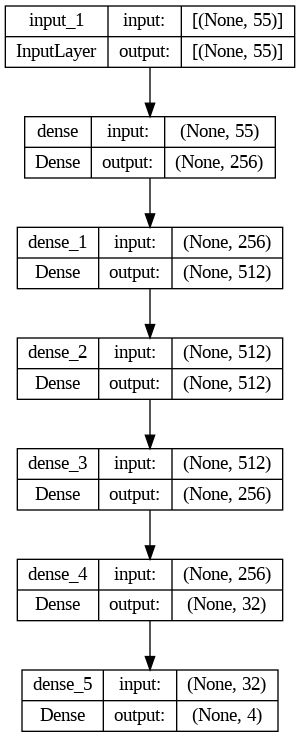

In [ ]:
#4.0 Preparing the ML Model
model = tf.keras.Sequential()
X_Train.shape[1]
model.add( tf.keras.layers.Input(shape = (X_Train.shape[1]) ))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))
model.summary()
plot_model(model, show_shapes=True)

#4.1 Compile the Model
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['acc'])

In [ ]:
#5.0 Training the model
#y_Train = to_categorical(y_Train,4)
#y_Test = to_categorical(y_Test,4)
y_Train.shape
y_Test.shape
model.fit(X_Train, y_Train, epochs=100)

(900, 4)

(300, 4)

Epoch 1/100
29/29 [==============================] - 0s 11ms/step - loss: 6.7817e-08 - acc: 1.0000
Epoch 2/100
29/29 [==============================] - 0s 11ms/step - loss: 6.6095e-08 - acc: 1.0000
Epoch 3/100
29/29 [==============================] - 0s 12ms/step - loss: 6.4638e-08 - acc: 1.0000
Epoch 4/100
29/29 [==============================] - 0s 11ms/step - loss: 6.2518e-08 - acc: 1.0000
Epoch 5/100
29/29 [==============================] - 0s 11ms/step - loss: 6.0929e-08 - acc: 1.0000
Epoch 6/100
29/29 [==============================] - 0s 11ms/step - loss: 6.0134e-08 - acc: 1.0000
Epoch 7/100
29/29 [==============================] - 0s 11ms/step - loss: 5.8412e-08 - acc: 1.0000
Epoch 8/100
29/29 [==============================] - 0s 11ms/step - loss: 5.7750e-08 - acc: 1.0000
Epoch 9/100
29/29 [==============================] - 0s 11ms/step - loss: 5.6558e-08 - acc: 1.0000
Epoch 10/100
29/29 [==============================] - 0s 12ms/step - loss: 5.4836e-08 - acc: 1.0000
Epoch 11/

In [ ]:
#Predicting
y_predict = model.predict(X_Test)
y_predict[:5]
y_Test[:5]


10/10 [==============================] - 0s 7ms/step


array([[3.6368408e-10, 9.9999994e-01, 5.4788091e-11, 4.6918771e-09],
       [2.3055405e-12, 2.4638136e-15, 9.9999994e-01, 2.4180774e-11],
       [9.9999994e-01, 4.6497103e-21, 1.2923595e-15, 9.5792228e-25],
       [9.2518654e-18, 9.9999994e-01, 4.5401157e-19, 1.4666595e-16],
       [3.6753998e-12, 4.1650931e-15, 9.9999994e-01, 2.6703976e-11]],
      dtype=float32)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)